In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    fromHB5Table1,
    readHEPDataCsv,
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# CMS 13TeV LHC

## `bbH>bb` [1805.12191](https://arxiv.org/abs/1805.12191)


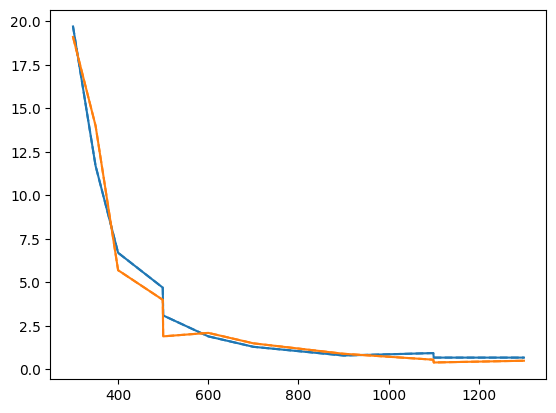

Looks good. Saving this to bbH_LHC13_CMS_36.json


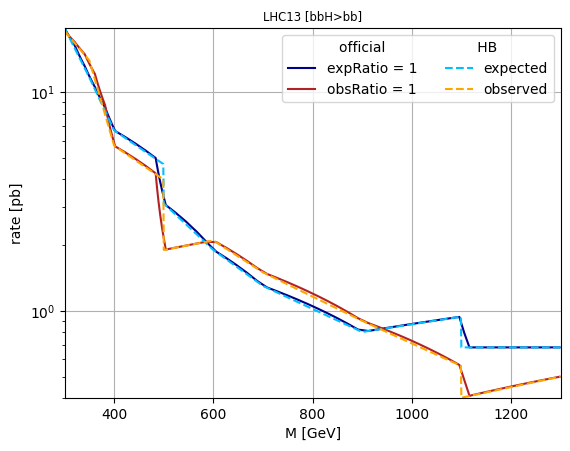

In [2]:
df = pd.DataFrame(
    data={
        "m": [300, 350, 400, 499, 500, 600, 700, 900, 1099, 1100, 1300],
        "obs": [19.1, 14, 5.7, 4.0, 1.9, 2.1, 1.5, 0.9, 0.56, 0.4, 0.5],
        "exp": [19.7, 11.7, 6.7, 4.7, 3.1, 1.9, 1.3, 0.8, 0.94, 0.68, 0.68],
    }
)
limitFile = implementChannelLimit(
    "1805.12191",
    {"channels": [["bbH", "bb"]]},
    "Fig. 6/Tab. 1",
    df,
    massResolution=resolution.bb["highMass"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## low mass `ggH>bb` CP-even [1810.11822](https://arxiv.org/abs/1810.11822)


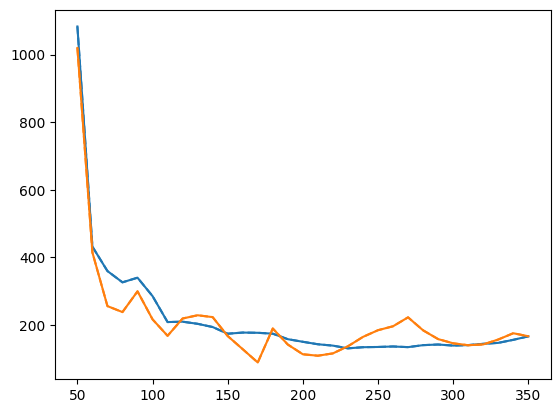

Looks good. Saving this to ggH_LHC13_CMS_36.json


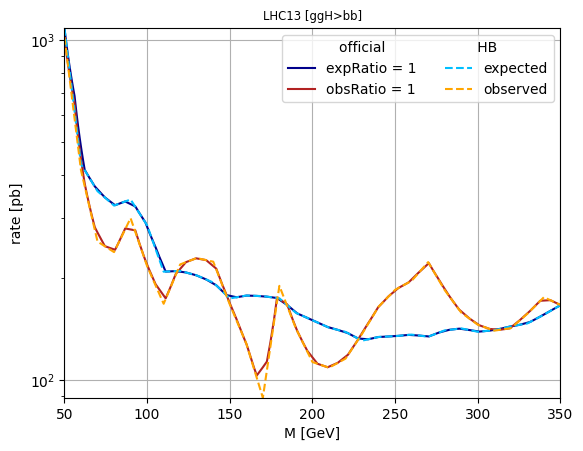

In [3]:
df = fromHB5Table1("181011822_CMS_H_bb_35.9fb-1", "CMS")
limitFile = implementChannelLimit(
    "1810.11822",
    {"channels": [["ggH", "bb"]]},
    "Fig. 7",
    df,
    idSuffix=1,
    massResolution=resolution.bb["medMass"],
    constraints={"CPValue": "even"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim, cp="even")


## low mass `ggH>bb` CP-odd [1810.11822](https://arxiv.org/abs/1810.11822)


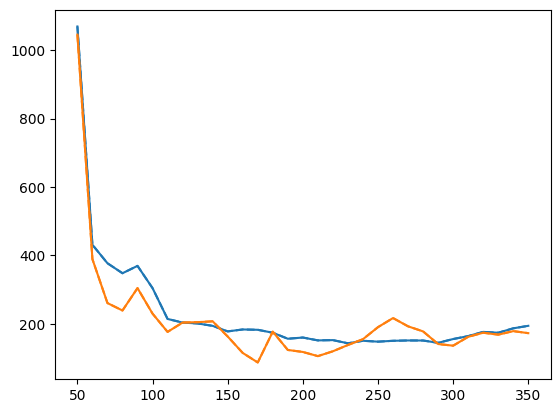

Looks good. Saving this to ggA_LHC13_CMS_36.json


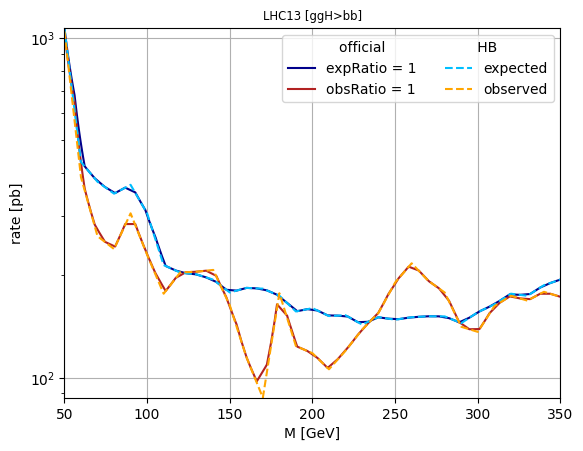

In [4]:
df = fromHB5Table1("181011822_CMS_A_bb_35.9fb-1", "CMS")
limitFile = implementChannelLimit(
    "1810.11822",
    {"channels": [["ggH", "bb"]]},
    "Fig. 8",
    df,
    idSuffix=2,
    massResolution=resolution.bb["medMass"],
    constraints={"CPValue": "odd"},
    prefix="ggA",
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim, cp="odd")


# CMS 8TeV LHC

## `VH>bb` full run 1 [1310.3687](https://arxiv.org/abs/1310.3687)


Multiple different luminosity values: [18.9, 5.1] using 18.9 unless you set it manually


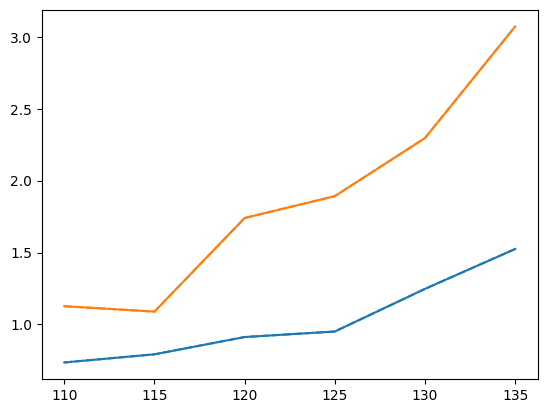

Looks good. Saving this to HV_LHC8_CMS_24.json
using effective coupling input for SM-normalized limit


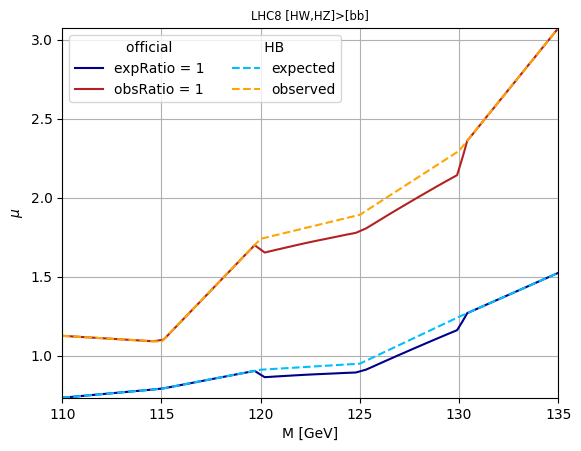

In [5]:
df = fromHB5Table1("13012_CMS_VH_bb_24fb-1", "CMS")
limitFile = implementChannelLimit(
    "1310.3687",
    {"channels": [["HZ", "bb"], ["HW", "bb"]]},
    "Fig. 6 (left)",
    df,
    luminosity=5.1 + 18.9,
    massResolution=resolution.bb["medMass"],
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `bbH>bb` 8TeV [1506.08329](https://arxiv.org/abs/1506.08329)

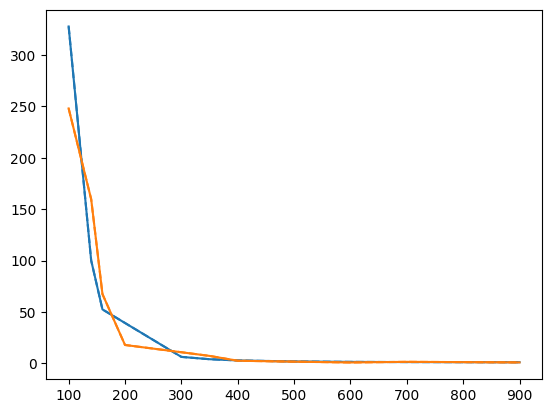

Looks good. Saving this to bbH_LHC8_CMS_20.json


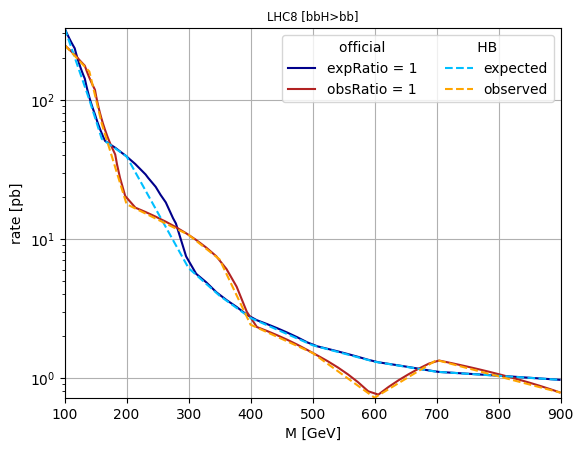

In [6]:
df = fromHB5Table1("1508329_CMS_Hb-bbb_19.7fb-1", "CMS")
limitFile = implementChannelLimit(
    "1506.08329",
    {"channels": [["bbH", "bb"]]},
    "Fig. 6",
    df,
    massResolution=resolution.bb["highMass"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `vbfH>bb` [1506.01010](https://arxiv.org/abs/1506.01010)

Multiple different luminosity values: [19.8, 18.3] using 19.8 unless you set it manually


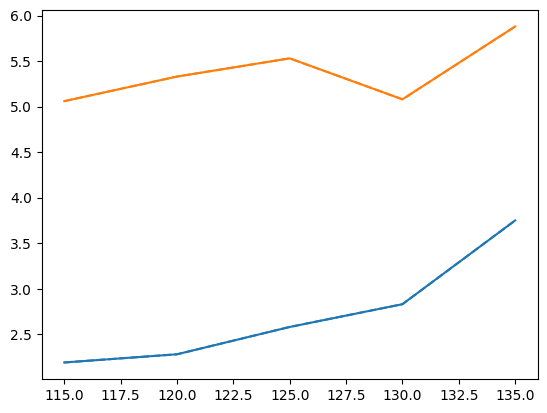

Looks good. Saving this to vbfH_LHC8_CMS_20.json
using effective coupling input for SM-normalized limit


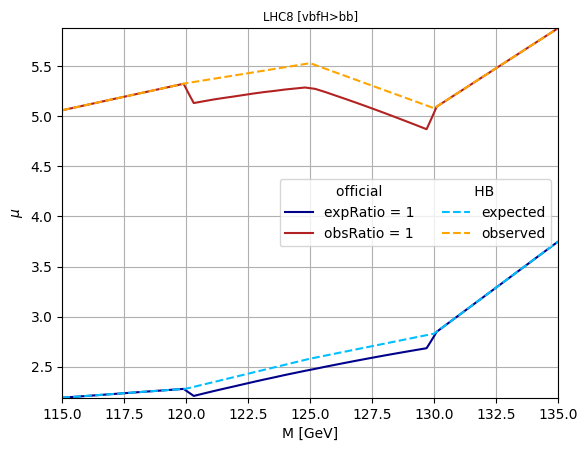

In [7]:
df = pd.DataFrame(
    data={
        "m": [115, 120, 125, 130, 135],
        "obs": [5.06, 5.33, 5.53, 5.08, 5.88],
        "exp": [2.19, 2.28, 2.58, 2.83, 3.75],
    }
)
limitFile = implementChannelLimit(
    "1506.01010",
    {"channels": [["vbfH", "bb"]]},
    "Fig. 11",
    df,
    luminosity=19.8,
    massResolution=resolution.bb["medMass"],
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
